# Linear Regression
- Linear Regression is one of the easiest to understand and more commonly used algorithm for regression related tasks. The algorithm's main formula is, `y = mx+c`. Where,
    - `y` is the predicted value/dependent variable that the model tries to output.
    - `x` is the input value/ independent variable that the model uses to make the prediction.
    - `m` is the slope of the line. It is also called the weight of a model. `m` determines the effect of x on y.
    - `b` is the bias, which indicates where the line croses the y-axis when x=0.


# Implementation of Linear Regression in python
- LinearRegression Models can be implemented in python using `scikit-learn`'s `LinearRegression` object. Let's get coding !

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Salary Data.csv") #Same data used in pandas and matplotlib

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


# Dependent and independent variables:
- When tackling any from of classification or regression task in ML, one very important concept that we need to know and be familiar with is the concept of dependent and independent variables.

- **Dependent Variables:**
    - As the term suggests, dependent variables are the variables which depend on some other variables. These variables are generally predicted by our models and aren't influenced by the user input.

- **Independent Variables:**
    - Independent variables are the opposite of dependent variables, these don't depend on any other variables are generally measured in an experiment.

---

# Special Case:
- Let us consider a DataFrame `df` with columns A,B and C such that C depends on B and B depends on A. In such cases, `B` is both dependent and independent variable and the dependency is said to be relative to the relationship being analyzed. Hence, **context matters when figuring out dependent and independent variables.** 

In [7]:
df = df[['Years of Experience','Salary']]

In our case, Years of Experience is the indepent variable and Salary is the dependent one.

In [8]:
X = df[['Years of Experience']].values  
Y = df[['Salary']].values #this returns a 2d array

The first step to making any ML model is to train it, for that purpose we need to split the available data in two major parts, training and testing. The model will only be given the training data and we'll validate it with the test data. We can either define our own function to split the data or we can use the `train_test_split` function from scikit-learn library, which provides us with a bit more control to the data splits.

train_test_split params:
- `test_size` &#8594; Determines how much data to train the model on, amount of data to be used in testing. (in our case, we are giving the model 80% of the data to be trained on and testing with the remaining 20%)
- `random_state`  &#8594; Like a seed for randomness of the data split, use of specific value in random_state geenrates the randomness in a predictable way.
- X & Y &#8594; The actual data, can be a numpy array or a tensor.

Now that our data is ready, let's train the model!

In [9]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

The `.fit()` is actual training part in a model. It's in this part that our model tries to figure out the **best-fit line**, the **best-fit line** is simply a straight line that can best represent the relationship between the input and output. The best-fit line follows the equation `Y=mX+c`, where `m` is the slpoe that represents the change in Y when X increases by unit value and `c` is te point where the line crosses Y-axis when X=0.

Now that we have a model, let's make some predictions! To make predictions, we can use the `.predict()` function. 

In [11]:
exp = float(input("Enter years of experience = "))
exp = np.array([[exp]])
predicted_salary = model.predict(exp)
print("Your predicted_salary = ",predicted_salary)

Your predicted_salary =  [[65634.02849515]]


We need to turn the input to a Numpy array as that is the same data type our model was trained on. This ensures that no errors arise during the prediction. Our model will output the result in a numpy array as well! 

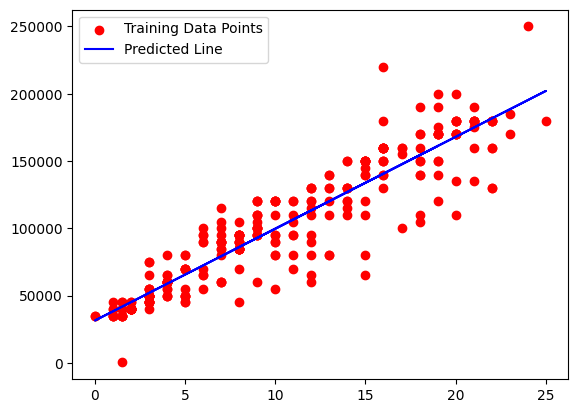

In [12]:
plt.scatter(X_train,Y_train,color = 'red',label="Training Data Points")
plt.plot(X_train,model.predict(X_train),color = 'blue',label="Predicted Line")
plt.legend()
plt.show()

In the chart above, we can see that the best fit line on our train data fits the data distrubition pretty much perfectly except for a few outliers. Let's see if the model figures out best fit line in the training data. 

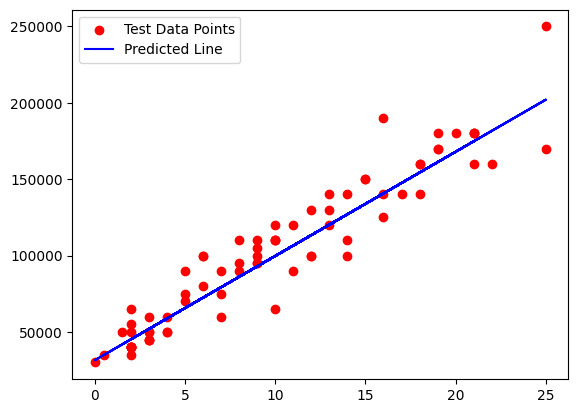

In [13]:
plt.scatter(X_test,Y_test,color = 'red',label="Test Data Points")
plt.plot(X_test,model.predict(X_test),color = 'blue',label="Predicted Line")
plt.legend()
plt.show()

And again, in the test data as well we can see that our model has figured out the best fit line! To further evaluate our model, we can use metrics like r<sup>2</sup> Score

In [14]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(Y_test, Y_pred)}")

R² Score: 0.8991338517367767


Our model is performing good, but we can make it better by **Scaling** the inputs given to the model. 

**Scaling:**
- Scaling refers to the process of adjusting the range of features so that they all are in a comparable range. In out current dataset, we can see that there are a few outliers that may have hindered our model. If we scale down our data and use the outliers, our model could perform better. There are several types of scaling in ML.
---

- Normalization:
    - Normalization or min-max scaling is a type of scaling that scales and transforms the features so that they lie within a specific range,generally 0-1. Formula for Min-Max Scaling:

    $
    x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
    $

    Where:

    $
    x =$ Original Feature

    $
    x_{\text{min}} =$ Minimum value of a feature in the dataset.

    $
    x_{\text{max}} =$ Maximum value of a feature in the dataset.

---


- Standardization:
    - Standardization is a type of scaling that centers the data around zero and *scales it to have unit variance*. It is also known as Z-Score Scaling. The formula for Standardization is:
        
$$
Z = \frac{x - \mu}{\sigma}
$$

where,

$
x =$ The original value of feature.

$
\mu =$ The mean of the feature.

$
\sigma =$ The Standard Deviation of the feature.

When the data is standardized, the mean is going to be 0 and the standard deviation is going to be 1.

**Scaling to unit variance:**
- Scaling to unit variance means making the data spread(variance) comparable across all features. To achieve this, we divide each data point by the standard deviation of the data.

---

- Robust Scaling:
    - Robust Scaling is a type of scaling that centers the data round the *median* and scales the data aroud the *IQR(Inter Quartile Range)*. The main advantage of robust scaling is that, it ensures proper spread even with outliers. The formula for Robust Scaling is:
    $$
    X_{\text{Scaled}} = \frac{X - median(X)}{IQR(X)}
    $$

    where,

    $$
    IQR(X) = Q_{\text{3}} - Q_{\text{1}} 
    $$

    $$
    Q_{\text{3}} = ({3(n+1)}/4)^{th} term
    $$

    $$
    Q_{\text{1}} = ({n+1}/{4})^{th} term
    $$
    
n = total count of numbers in the data
    

---

- Max Abs Scaling:
    - Max Abs Scaling is a type of scaling that is used when the data is already centered around 0 but needs to be scaled around $-1$ and $1$. This type of scaling is useful in datasets where *sparsity needs to be preserved.* It's formula is:
        $$
        X' = \frac{\text{X}}{\text{max(|X|)}}
        $$

    where, 
    $|X|$ is the absolute value of $X$

Now, that we have learned about the types of scaling. Let's use some of them in Code!


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

Do note that we only scale the X/indepentent value when scaling our data. The main reason being that our model needs to treat all features equally. Now let's re train our model on the scaled data and check it's performance!

In [16]:
scaled_model = LinearRegression()
scaled_model.fit(scaled_X_train,Y_train)

LinearRegression()

In [17]:
years_experience = float(input("Enter your years of experience"))
inp_model = np.array([[years_experience]])
print(scaled_model.predict(inp_model))

[[322033.56971038]]


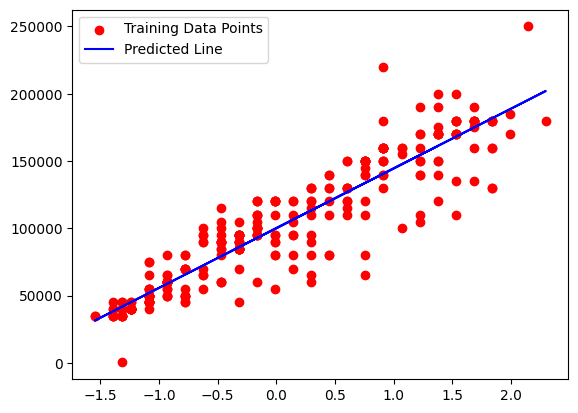

In [18]:
plt.scatter(scaled_X_train,Y_train,color = 'red',label="Training Data Points")
plt.plot(scaled_X_train,scaled_model.predict(scaled_X_train),color = 'blue',label="Predicted Line")
plt.legend()
plt.show()

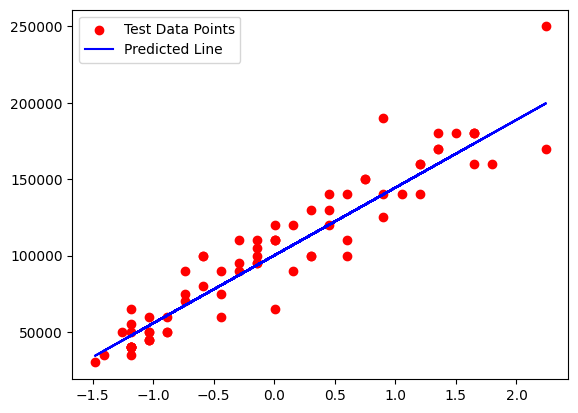

In [19]:
plt.scatter(scaled_X_test,Y_test,color = 'red',label="Test Data Points")
plt.plot(scaled_X_test,scaled_model.predict(scaled_X_test),color = 'blue',label="Predicted Line")
plt.legend()
plt.show()

Our model seems to have performed well in the first glance, however taking a second look at the charts we can see that the model has standardized the values in a way that goes in the range of -ve numbers. Since it is not possible. Our model with scaled inputs is not a good one.

Let's see if Robust Scaling can fix this issue!

In [21]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
robust_scaled_X_train = robust_scaler.fit_transform(X_train)
robust_scaled_X_test = robust_scaler.fit_transform(X_test)

In [22]:
robust_lr_model = LinearRegression()

robust_lr_model.fit(robust_scaled_X_train,Y_train)

LinearRegression()

In [23]:
exeperience = float(input("Enter your years of experience"))
model_input = np.array([[exeperience]])
robust_lr_model.predict(model_input)

array([[468166.84881948]])

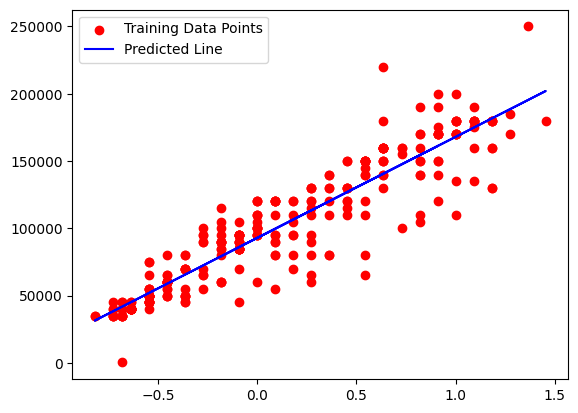

In [25]:
plt.scatter(robust_scaled_X_train,Y_train,color = 'red',label="Training Data Points")
plt.plot(robust_scaled_X_train,robust_lr_model.predict(robust_scaled_X_train),color = 'blue',label="Predicted Line")
plt.legend()
plt.show()

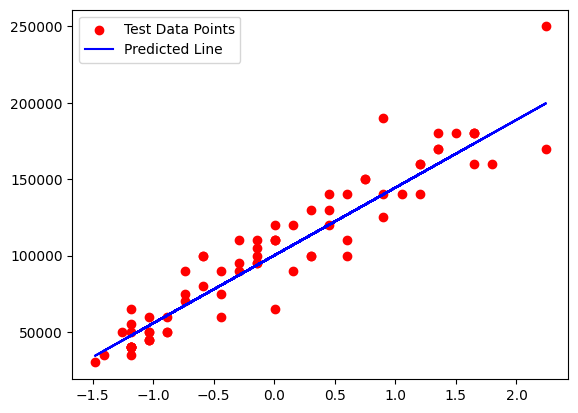

In [26]:
plt.scatter(scaled_X_test,Y_test,color = 'red',label="Test Data Points")
plt.plot(scaled_X_test,scaled_model.predict(scaled_X_test),color = 'blue',label="Predicted Line")
plt.legend()
plt.show()

And again, our model has diverted to -ve values, indicating that what we did in the beginning was correct, however the comcepts of scaling is very important in ML. Now let's talk about a few important concepts related to Linear Regression before moving on to other types of regression:
- Loss Functions
- Cost Functions
- Limitations of Linear Regression
- Proper model evaluation.


---

- Loss Functions:
    - Loss functions in the context of machine learning is a special type of function that calculates how far the model's predictions are from the actual values. when making any ML model, our goal should be to minimize the loss function. It provides us with a measurable way to evaluate the model without overcomplicating the process too much. 
    
    - Key principles  of loss functions:
        - Performance Measurement:
            - Loss functions provide us with a clear metric to evaluate our model's performance.

        - Balancing *Bias and Variance*:
            - Loss functions help us balance <u>bias and variance</u> in our ML models. Both of which if not balanced perfectly, will hamper the model's performance.
        - Direction for Improvement:
            - Loss Functions help the model better itself by directing the algorithm used to adjust the parameters accordingly.
    
    - Types of Loss Function:
        - Loss functions simialr to ML models can be classified in two types, Regression and Classification. Each of the loss functions are applied to the matching models (Regression functions are applied in regression models and classification functions are applied in classification models.), Let's look at some examples of loss functions of both types to understand them better!


---

- Examples of Loss functions:

1) Mean Squared Error (MSE):
    - MSE is a loss function used in regression algorithms like Linear Regression. It works by calculating the average squared difference of the predicted and actual values. The formula for MSE is:
    $$
    MSE = \frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2
    $$

    Where,

    $n$ = number of samples in dataset.

    $Y_i$ = Actual value of the sample

    $\hat{Y}_i$ = Predicted value of the sample

    A code example of this is given below:
    

In [3]:
actual_data = [1,2,3,4,5,6,7]
model_predicted = [0.85,1.88,2.66,3.88,4.85,5.8,7.8]

In [4]:
def mse(actual:list[int|float],predicted:list[int|float])->float:
    loss_values = [(a-p)**2 for a,p in zip(actual,predicted)]
    return sum(loss_values)/len(actual)

In [5]:
mse(actual=actual_data,predicted=model_predicted)

0.12419999999999998

The closer our MSE is to 0, the better our model is considered. So, by that logic, we can say that our model is good (for the dummy values provided there).

---
2) Mean Absolute Error(MAE):
    - Mean Absolute Error, similar to mean squared error, follows a sum and mean format to calcualte the loss. The formula for MAE is given below:
    $$
    MAE = \frac{1}{n} \sum_{i=1}^n |Y_i - \hat{Y}_i|
    $$

    Where,

    $n$ = number of samples in dataset.

    $Y_i$ = Actual value of the sample

    $\hat{Y}_i$ = Predicted value of the sample

Code example:

In [1]:
actual_data = [1,2,3,4,5,6,7]
model_predicted = [0.85,1.88,2.66,3.88,4.85,5.8,7.8]

In [8]:
def mae(actual:list[int|float],predicted:list[int|float])->float:
    number_samples = len(actual)
    sum = 0
    for i in range(number_samples):
        sum+=abs(actual[i] - predicted[i])

    return sum/number_samples

In [9]:
mae(actual_data,model_predicted)

0.2685714285714286